# HMM build and analysis

Here we will construct and analyze HMM models using MSA as the input data. We will utilize several databases as sources to enhance our analysis and gain valuable insights from the generated HMM profiles.

## Load the data

We are working only with the disordered regions, thus we should keep only the related information.


In [1]:
# Importing the libraries and functions
from functions import *

In [2]:
# Dataframe of disordered regions
disordered = pd.read_csv("disordered_df.csv")
print(f"The number of rows containing disordered regions: {len(disordered)}")
disordered.head(5)

The number of rows containing disordered regions: 2887


,query_id,subject_id,query_len,hsp_len,query_seq,match_seq,subject_seq,query_start,query_end,subject_start,subject_end,identity,positive,gaps,eval,bit_score,count
0,Q9H832,A0A6J2FM24,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGAAGPGAS V GVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGAAGPGASGVTGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
1,Q9H832,A0A3Q7W6Y2,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGA GPGAS VAGVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGATGPGASGVAGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
2,Q9H832,A0A2U3VK69,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGAAGPGAS V GVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGAAGPGASGVTGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
3,Q9H832,A0A2Y9JVH5,354,358,MAESPTEEAATA----GAGAAGPGASSVAGVVGVSGSGGGFGPPFL...,MAESPTEEAATA GAGAAGPGAS VAGVVGVSGSG FGPPFL...,MAESPTEEAATATATAGAGAAGPGASGVAGVVGVSGSG--FGPPFL...,1,354,1,356,351,351,6,0.0,1854.0,200
4,Q9H832,A0A8C7ALE4,354,358,MAESPTEEAATA----GAGAAGPGASSVAGVVGVSGSGGGFGPPFL...,MAESPTEEAATA GAGAAGPGAS VAGVVGVSGSG FGPPFL...,MAESPTEEAATATATAGAGAAGPGASGVAGVVGVSGSG--FGPPFL...,1,354,1,356,351,351,6,0.0,1854.0,200


In [3]:
# Obtain the information about 1 Uniprot query ID
%store -r id_dis i
id = id_dis
i = i
curated_disprot = pd.read_csv("curated_disprot.csv")
curated_query = curated_disprot[curated_disprot['acc'] == id]

print(f"The number of disordered regions in the {id} protein: {len(curated_query)}")
curated_query.head()

The number of disordered regions in the Q9H832 protein: 2


,acc,evidence,feature,source,start,end,length
872,Q9H832,curated,disorder,disprot,1,99,99
873,Q9H832,curated,disorder,disprot,327,354,28


## HMMsearch results analysis

After performing hmmsearch against RP 15%, we retrieve the dataframe `hmmsearch_results` with the statistics.

In [4]:
# Retrieve the dataframe with the hmmsearch results
%store -r hmmsearch_results
print(f"Number of hmmsearch hits for the {i} disordered region of the {id} protein:", len(hmmsearch_results))
hmmsearch_results

Number of hmmsearch hits for the 1 disordered region of the Q9H832 protein: 17


,E-value,score,bias,E-value,score,bias,exp,N,Sequence,hmm_from,hmm_to,ali_from,ali_to,env_from,env_to
0,8.8e-32,119.4,17.6,1.3e-31,118.9,17.6,1.3,1,A0A7N9CX17,1,98,1,99,1,99
1,1.2e-31,119.0,17.6,1.7e-31,118.5,17.6,1.3,1,Q9H832,1,98,1,99,1,99
2,2.8e-30,114.6,18.1,4.2e-30,114.0,18.1,1.3,1,Q3B7D1,1,98,1,101,1,101
3,5.4e-30,113.7,18.0,8.1e-30,113.1,18.0,1.3,1,Q3UE37,1,98,1,101,1,101
4,3.3e-21,85.5,19.7,1.4e-20,83.5,19.7,1.9,1,A0A2K5VU74,1,98,1,86,1,86
5,4.2e-10,49.9,25.5,1.4e-08,45.0,5.3,2.3,2,H3B9H2,1,62,1,57,1,68
6,4.2e-08,43.5,6.0,7.6e-08,42.7,6.0,1.3,1,A0A4W3JHM2,16,97,4,87,2,88
7,5.2e-08,43.2,22.0,9.6e-08,42.3,22.0,1.5,1,E1BQ87,1,97,1,103,1,104
8,5.3e-08,43.1,2.3,1.1e-07,42.1,2.3,1.6,1,Q6DG60,67,98,39,71,2,71
9,1e-07,42.2,21.8,2.5e-07,41.0,12.1,2.3,2,A0A444UI62,1,68,1,67,1,71


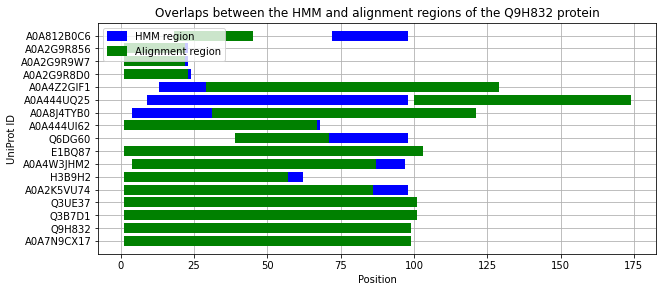

In [41]:
import matplotlib.pyplot as plt

def plot_overlaps(hmm_results, curated_query):
    unique_uniprot_ids = hmm_results['Sequence'].unique()

    if len(unique_uniprot_ids) == 0:
        print("No overlapping regions to plot.")
        return

    # Plot overlapping regions
    fig, ax = plt.subplots(figsize=(10, 0.25 * len(unique_uniprot_ids)))

    # Plot the regions using 'hmm_from' and 'hmm_to' for Pfam, and 'ali_from' and 'ali_to' for Disprot
    ax.hlines(hmm_results['Sequence'], hmm_results['hmm_from'], hmm_results['hmm_to'], linewidth=10, color='blue', label='HMM region', linestyle='-')
    ax.hlines(hmm_results['Sequence'], hmm_results['ali_from'], hmm_results['ali_to'], linewidth=10, color='green', label='Alignment region', linestyle='-')
#     ax.hlines(hmm_results['Sequence'], hmm_results['env_from'], hmm_results['env_to'], linewidth=10, color='pink', label='Envelope region', linestyle='-')

    ax.set_yticks(hmm_results['Sequence'])
    ax.set_yticklabels(hmm_results['Sequence'])

    # Create a custom range for the y-axis based on the unique 'uniprot_id' values
    y_axis_range = range(len(unique_uniprot_ids))
    ax.set_ylim(min(y_axis_range) - 1, max(y_axis_range) + 1)
    
    # Add annotations at specific positions
    for idx, row in hmm_results.iterrows():
        x_pos = (row['hmm_from'] + row['hmm_to']) / 2  # Calculate the x position for annotation using 'hmm' coordinates
        y_pos = row['Sequence']  # Use the 'uniprot_id' as the y position

    plt.title(f'Overlaps between the HMM and alignment regions of the {id} protein')
    plt.xlabel('Position')
    plt.ylabel('UniProt ID')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

plot_overlaps(hmmsearch_results, curated_query)


Using the `protein2ipr_iterator` searching in the database using Uniprot IDs from the `stats_rp_15`, we checked the overlap of the retrieved regions in RP 15% with protein2ipr database.

In [5]:
# Create a dataframe of a protein2ipr results found 
pfam_overlap = pd.read_csv(f"pfam_overlap_{id_dis}.csv")
print(f"The number of regions for the {i} disordered region of the {id} protein in Protein2ipr:", len(pfam_overlap))
print("The retrieved Pfam domains:", list(set(pfam_overlap['pfam_id'])))
pfam_overlap

The number of regions for the 1 disordered region of the Q9H832 protein in Protein2ipr: 12
The retrieved Pfam domains: ['PF00179']


,uniprot_id,ipr_id,description,pfam_id,start_pos,end_pos,length
0,Q9H832,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,103,231,129
1,A0A444UQ25,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,178,306,129
2,A0A4W3JHM2,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,92,220,129
3,A0A4Z2GIF1,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,133,264,132
4,A0A7N9CX17,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,103,231,129
5,A0A812B0C6,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,49,176,128
6,A0A8J4TYB0,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,125,253,129
7,H3B9H2,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,128,256,129
8,Q3B7D1,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,105,233,129
9,Q3UE37,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,105,233,129


Then we check if there are the hits with a particular Uniprot ID, given this ID and the position of the region.

In [7]:
# Select an intersection with the region of interest
def filter_pfam_data(id, i):
    pfam_overlap_filtered = pfam_overlap[~pfam_overlap.apply(lambda x: any(
        (x['start_pos'] > curated_region['end']) or (x['end_pos'] < curated_region['start'])
        for _, curated_region in curated_query.iterrows()), axis=1)]
    if len(pfam_overlap_filtered) == 0:
        print(f"No intersections with the {id}_{i} region found")
    return pfam_overlap_filtered

filtered_pfam = filter_pfam_data(id, i)
print(f"The number of sequences intersected with the {i} disordered region of the {id} protein:", len(filtered_pfam))
print("The retrieved Pfam regions:", list(set(filtered_pfam['pfam_id'])))
filtered_pfam

The number of sequences intersected with the 1 disordered region of the Q5VZK9 protein: 10
The retrieved Pfam regions: ['PF16000']


,uniprot_id,ipr_id,description,pfam_id,start_pos,end_pos,length
3,A0A0G2JXG7,IPR031943,"CARMIL, C-terminal domain",PF16000,790,1081,292
7,A0A2K6SDR1,IPR031943,"CARMIL, C-terminal domain",PF16000,786,1079,294
11,A0A2K6SDU5,IPR031943,"CARMIL, C-terminal domain",PF16000,786,1079,294
16,A0A8I6A2B1,IPR031943,"CARMIL, C-terminal domain",PF16000,786,1077,292
21,A0A8I6AJW0,IPR031943,"CARMIL, C-terminal domain",PF16000,790,1081,292
26,A0A8I6G5R0,IPR031943,"CARMIL, C-terminal domain",PF16000,786,1077,292
31,F1M0N7,IPR031943,"CARMIL, C-terminal domain",PF16000,736,1027,292
35,G7P4K6,IPR031943,"CARMIL, C-terminal domain",PF16000,760,1053,294
39,Q5VZK9,IPR031943,"CARMIL, C-terminal domain",PF16000,786,1079,294
43,Q6EDY6,IPR031943,"CARMIL, C-terminal domain",PF16000,790,1081,292


In [8]:
# Plot the overlap between disprot region and Pfam
def plot_overlapping_proteins(pfam_overlap, curated_query, id, i):
    unique_uniprot_ids = pfam_overlap['uniprot_id'].unique()

    if len(unique_uniprot_ids) == 0:
        print("No overlapping regions to plot.")
        return

    # Plot overlapping regions
    fig, ax = plt.subplots(figsize=(10, 0.25 * len(unique_uniprot_ids)))

    # Plot the regions
    ax.hlines(pfam_overlap['uniprot_id'], pfam_overlap['start_pos'], pfam_overlap['end_pos'], linewidth=10, color='lightblue', label='Pfam Region')
    ax.hlines(pfam_overlap['uniprot_id'], curated_query['start'], curated_query['end'], linewidth=10, color='lightgreen', label='Disprot Region')

    ax.set_yticks(pfam_overlap['uniprot_id'])
    ax.set_yticklabels(pfam_overlap['uniprot_id'])

    # Create a custom range for the y-axis based on the unique 'uniprot_id' values
    y_axis_range = range(len(unique_uniprot_ids))
    ax.set_ylim(min(y_axis_range) - 1, max(y_axis_range) + 1)
    
    # Add annotations at specific positions
    for idx, row in pfam_overlap.iterrows():
        x_pos = (row['start_pos'] + row['end_pos']) / 2  # Calculate the x position for annotation
        y_pos = row['uniprot_id']  # Use the 'uniprot_id' as the y position
        ax.annotate(row['pfam_id'], (x_pos, y_pos), ha='center', va='center', fontsize=8)

    plt.title(f'Overlaps between the {i} disordered region of the {id} protein with the other proteins')
    plt.xlabel('Position')
    plt.ylabel('UniProt ID')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

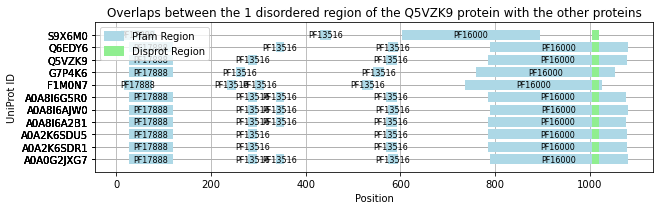

In [9]:
# Plot only the intercepting regions
plot_overlapping_proteins(pfam_overlap, curated_query, id, i)

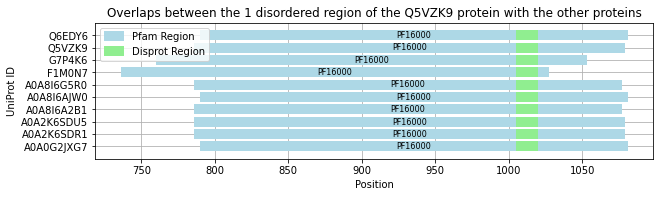

In [10]:
# Plot only the intercepting regions
plot_overlapping_proteins(filtered_pfam, curated_query, id, i)